In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [19]:
# Load dataset
data = pd.read_csv("D:\\Documents\\py_folders\\git_github\\parkinson_diseases\\dataset.csv")


In [20]:
# Prepare features and target
x = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

In [21]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [22]:
# Standardize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
# Train SVM model
model = SVC(kernel='linear', random_state=2)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=2)

In [24]:
# Evaluate model
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc = accuracy_score(y_test, model.predict(x_test))
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.8846153846153846
Testing Accuracy: 0.8717948717948718


In [25]:
# Predict for new data
# Extract the first row from the dataset (excluding 'name' and 'status') as input data
input_data = data.drop(columns=['name', 'status'], axis=1).iloc[5:6]  # Keep it as a DataFrame


In [26]:
# Standardize the input data using the same scaler
input_data_std = scaler.transform(input_data)


In [27]:
# Predict
prediction = model.predict(input_data_std)

# Output the prediction
print("Prediction for the first data row:", prediction)


Prediction for the first data row: [1]


In [28]:
# Check class distribution
class_distribution = data['status'].value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 status
1    147
0     48
Name: count, dtype: int64


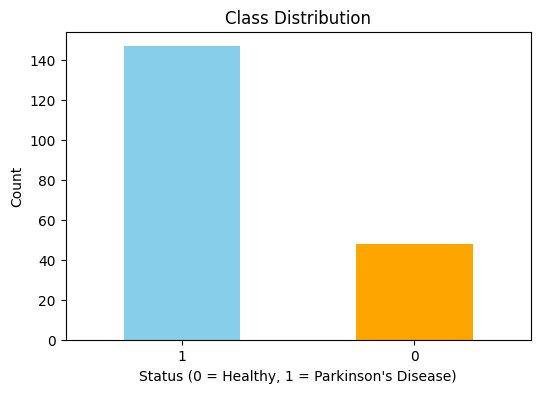

In [29]:

import matplotlib.pyplot as plt
# Visualizing class distribution
class_distribution = data['status'].value_counts()
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's Disease)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [30]:
import seaborn as sns
# Correlation heatmap
# Fix correlation error by dropping non-numeric columns
correl = data.drop(columns=['name']).corr()

In [31]:
# Fix StandardScaler warning
input_array = np.asarray(input_data).reshape(1, -1)
input_df = pd.DataFrame(input_array, columns=x.columns)  # Convert to DataFrame
std_data = scaler.transform(input_df)  # Now transform with feature names


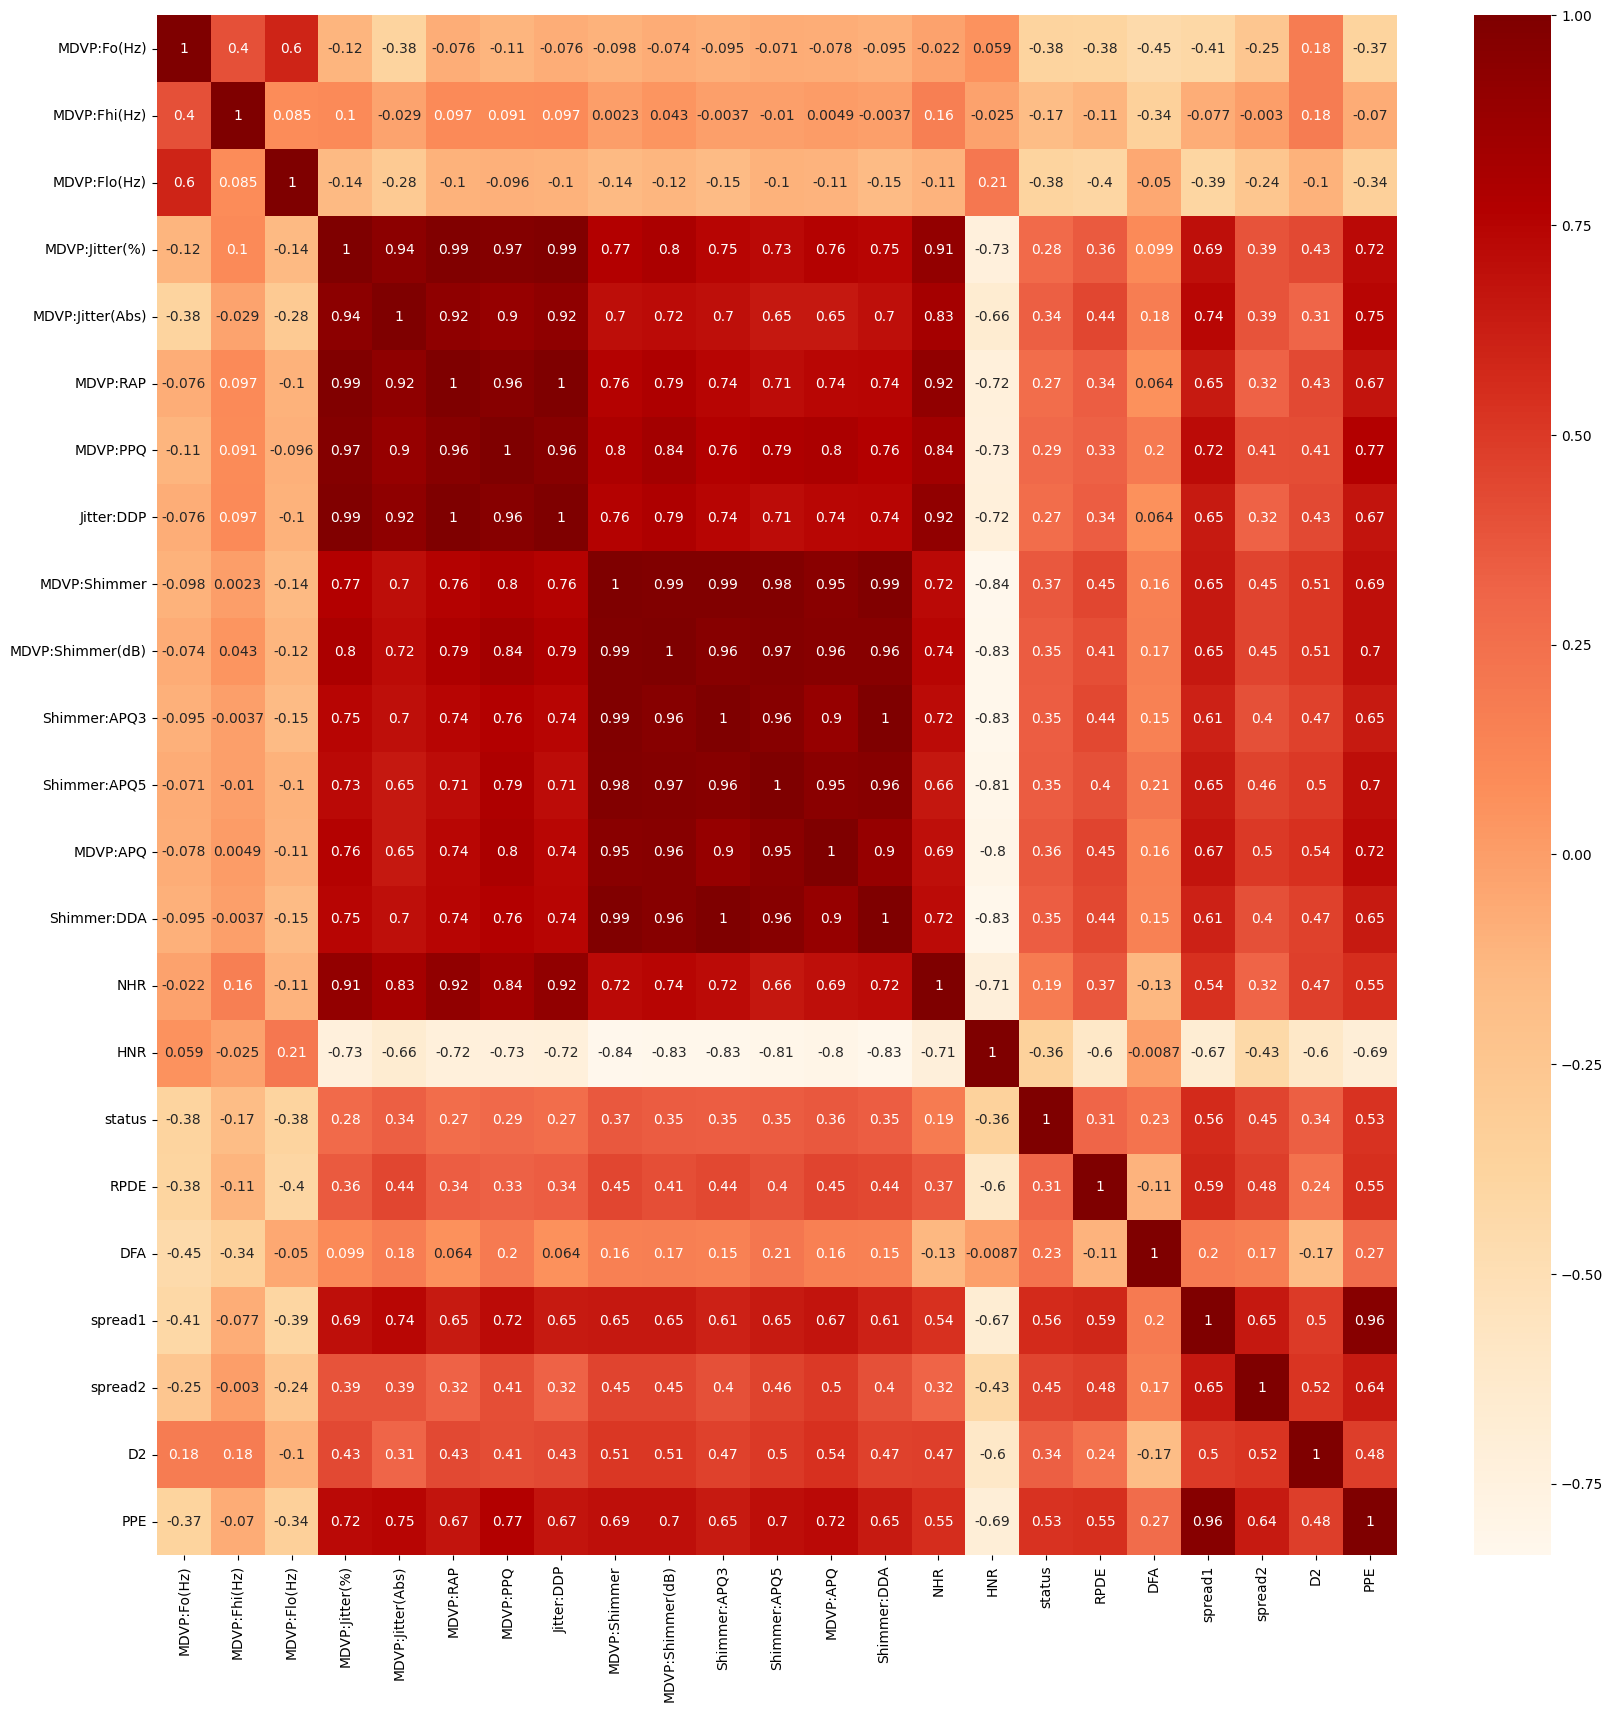

In [32]:
# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correl, annot=True, cmap='OrRd')
plt.show()

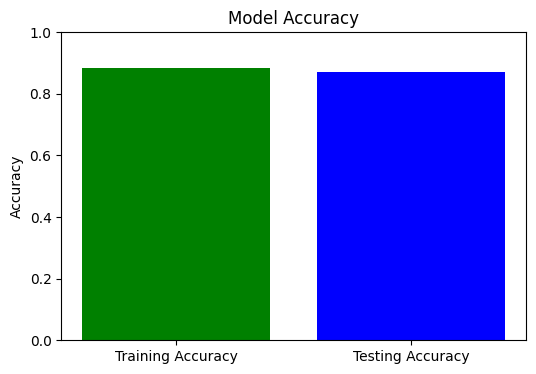

In [34]:

# Accuracy visualization
accuracies = [train_acc, test_acc]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['green', 'blue'])
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

In [35]:
# Prediction visualization of user input data 
result = "Parkinson's Disease" if prediction[0] == 1 else "Healthy"
colors = ['red'] if prediction[0] == 1 else ['green']

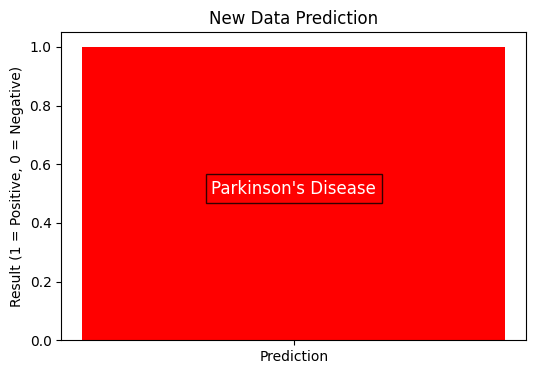

In [36]:
plt.figure(figsize=(6, 4))
plt.bar(["Prediction"], [1], color=colors)
plt.title("New Data Prediction")
plt.ylabel("Result (1 = Positive, 0 = Negative)")
plt.xticks(rotation=0)
plt.text(0, 0.5, result, fontsize=12, ha='center', color='white', bbox=dict(facecolor=colors[0], alpha=0.8))
plt.show()

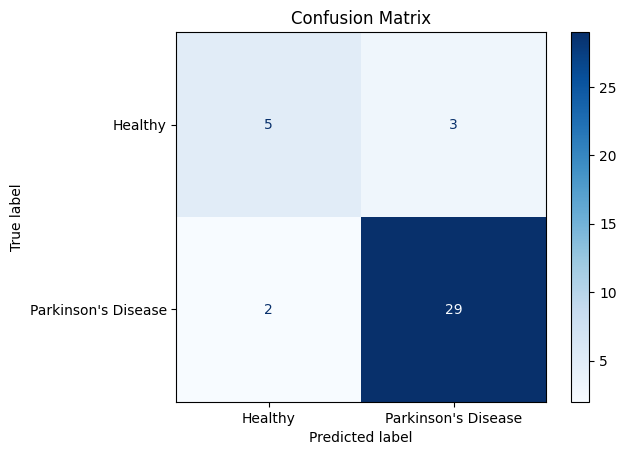

In [37]:
# for confusion matrix visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion matrix
cm = confusion_matrix(y_test, model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Parkinson's Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()